<a href="https://colab.research.google.com/github/duongtran96/Project_Image_Retrieval/blob/Feature/1_Project_Image_Retrieval_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
!unzip data

In [ ]:
ROOT = "data"
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [ ]:
def read_image_from_path(path, size):
    im = Image.open(path).convert("RGB").resize(size)
    return np.array(im)

In [ ]:
def folder_to_images(folder, size):
    list_dir = [folder + "/" + name for name in os.listdir(folder)]
    images_np = np.zeros(shape = (len(list_dir), *size, 3))
    images_path = []

    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)

    images_path = np.array(images_path)
    return images_np, images_path

In [ ]:
def plot_results(query_path, ls_path_score, reverse = False):
    fig = plt.figure(figsize = (15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(query_path, size = (448, 448)))
    plt.title(f"Query Image: {query_path.split('/')[2]}", fontsize = 16)
    plt.axis('off')
    for i, path in enumerate(sorted(ls_path_score, key = lambda x : x[1], reverse = reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size = (448, 448)))
        plt.title(f"Top {i - 1}: {path[0].split('/')[2]}", fontsize = 16)
        plt.axis('off')
    plt.show()

Truy vấn hình ảnh độ đo L1

In [ ]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(data - query), axis = axis_batch_size)

In [ ]:
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []

    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))

    return query, ls_path_score

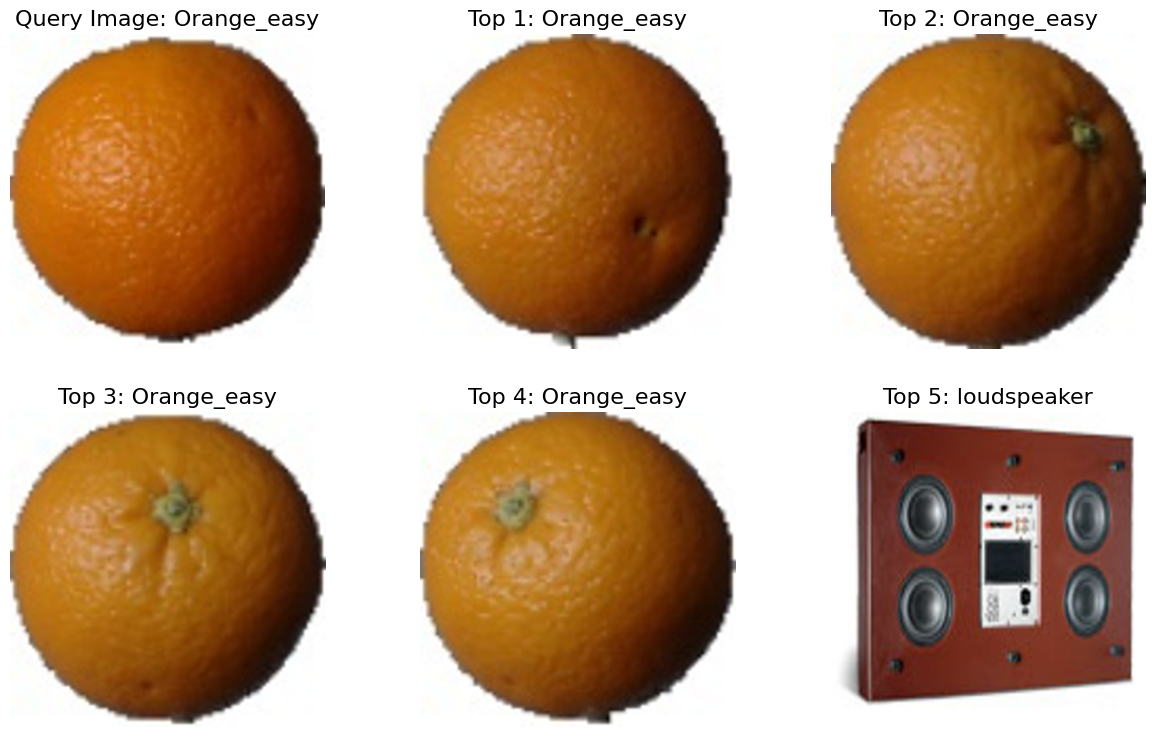

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse = False)

Truy vấn hình ảnh độ đo L2



In [ ]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.mean((data - query)**2, axis = axis_batch_size)

In [ ]:
def get_l2_score(root,img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)

            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

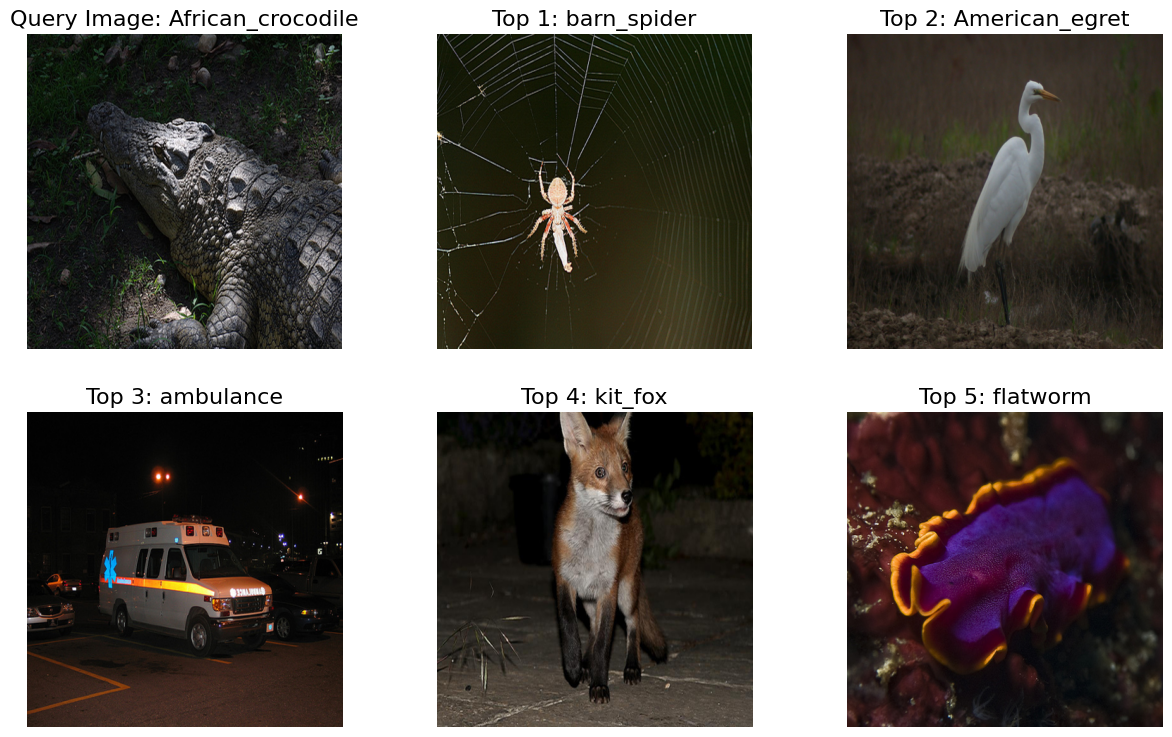

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse = False)

Truy vấn hình ảnh với độ đo Cóine Similarity

In [ ]:
# Hàm tương đồng cosine similarity
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis = axis_batch_size))

    return np.sum(data * query, axis = axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

In [ ]:
# tạo hàm get_cosine_similarity_score
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, size)))

    return query, ls_path_score

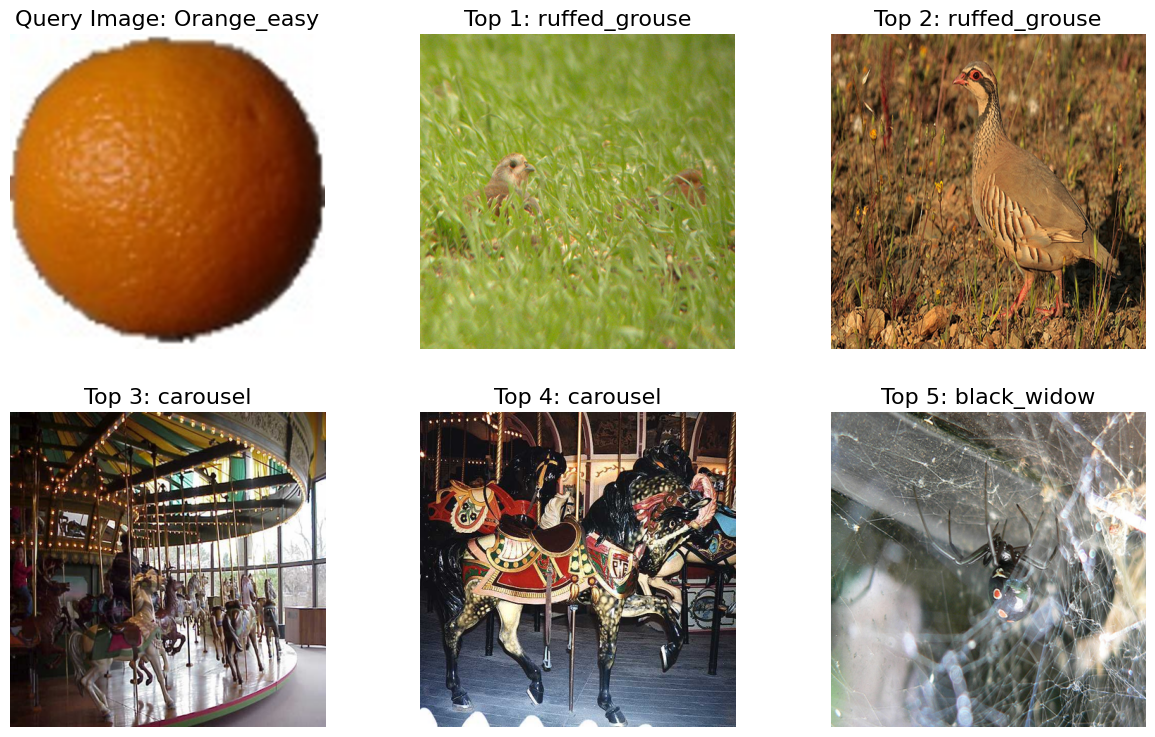

In [ ]:
# output cosine similarity
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse = True)

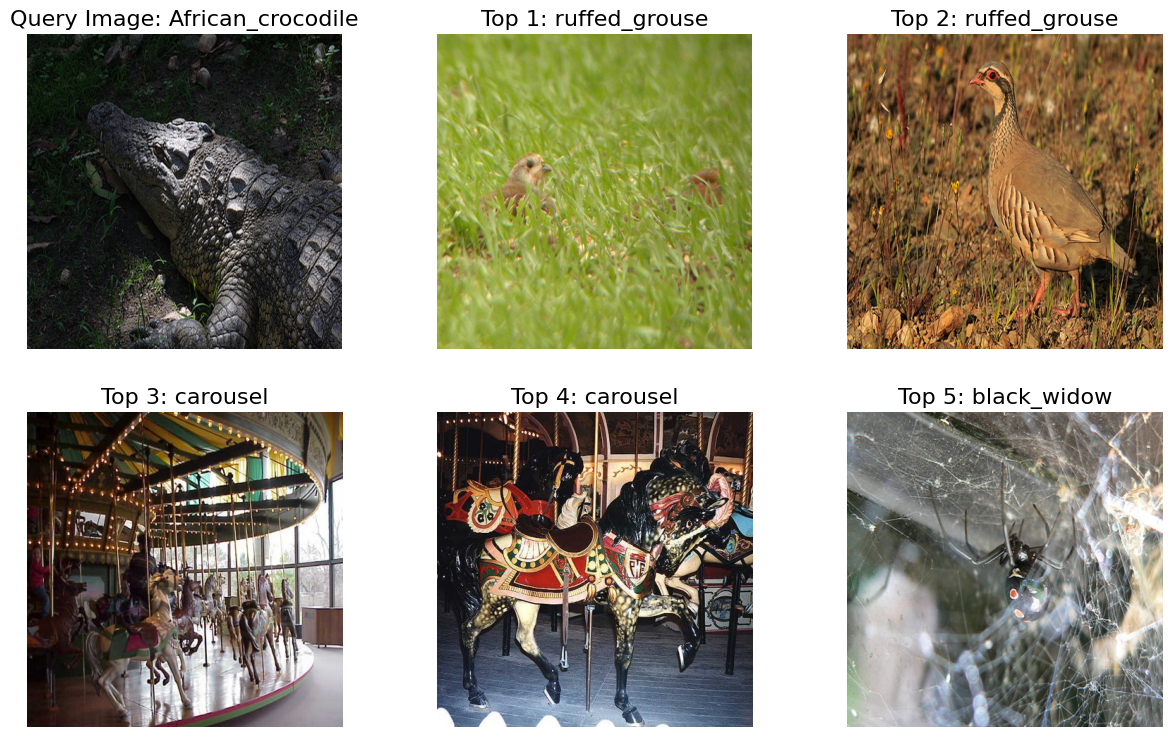

In [ ]:
# output cosine similarity
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse = True)

Truy vấn hình ảnh với độ đo Correlation Coefficient

In [ ]:
# hàm tương đồng correlation coefficent
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis = axis_batch_size, keepdims = True)
    query_norm = np.sqrt(np.sum(query_mean **2))
    data_norm = np.sqrt(np.sum(data_mean **2, axis = axis_batch_size))

    return np.sum(data_mean * query_mean, axis = axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

In [ ]:
# hàm get correlation coefficient
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))

    return query, ls_path_score

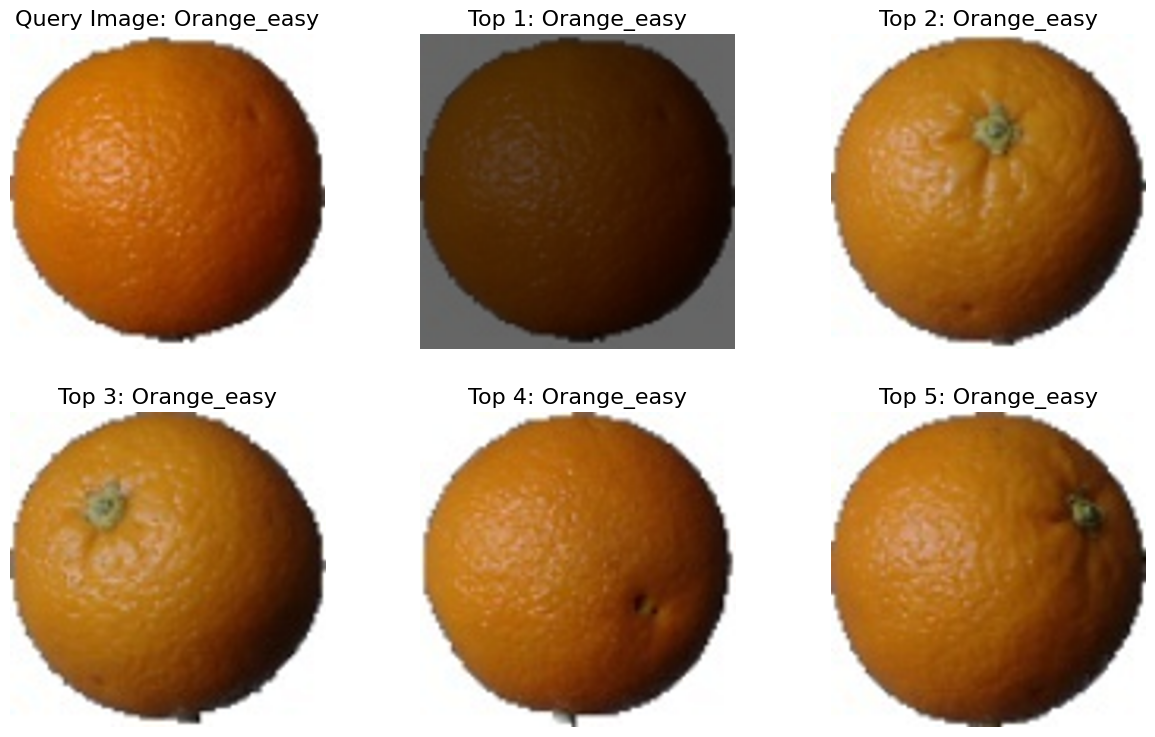

In [ ]:
# output cosine similarity
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse = True)

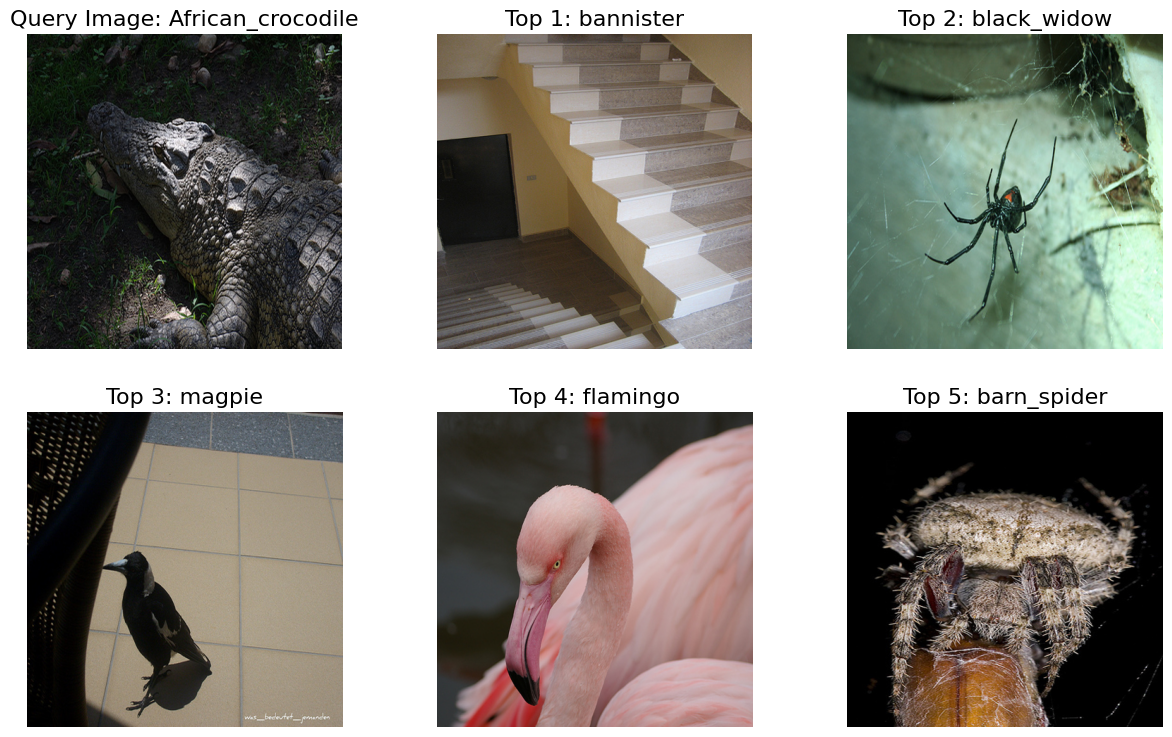

In [ ]:
# output cosine similarity
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse = True)

Tối ưu hóa quá trình truy vấn hình ảnh sử dụng mô hình CLIP và CSDL vector

In [ ]:
def get_files_path(path):
    files_path = []
    for label in CLASS_NAME:
        label_path = path + "/" + label
        filenames = os.listdir(label_path)
        for filename in filenames:
            filepath = label_path + "/" + filename
            files_path.append(filepath)

    return files_path

Truy vấn ảnh với L2 Collection

In [ ]:
# Create a Chroma Client
chroma_client = chromadb.Client()

# Create a collection
l2_collection = chroma_client.get_or_create_collection(name = 'l2_collection', medatadata = {HNSW_SPACE: "12"})
add_embedding(collection = l2_collection, files_path = files_path)

In [ ]:
def search(image_path, collection, n_results):
    query_image = Image.open(image_path)
    query_embedding = get_single_image_embedding(query_image)
    results = collection.query(
        query_embedding = [query_embedding],
        n_results = n_results
    )
    return results

In [ ]:
test_path = f"{ROOT}/test"
test_files_path = get_files_path(path = test_path)
test_path = test_files_path[1]
l2_results = search(image_path = test_path, collection = l2_collection, n_results = 5)
plot_results(image_path = test_path, files_path = files_path, results = l2_results)

Truy vấn hình ảnh với Cosine Similarity Collection

In [ ]:
# Create a collection
cosine_collection = chroma_client.get_or_create_collection(name = "Cosine_collection", metadata = {HNSW_SPACE: "cosine"})
add_embedding(collection = cosine_collection, files_path = files_path)